Parsing through govsingapore_output.csv
3209
Parsing through leehsienloong_output.csv
12201
Parsing through PAPSingapore_output.csv
15406
Parsing through PeoplesPowerSG_output.csv
16387
Parsing through thereformparty_output.csv
19576
Parsing through TPPSG_output.csv
19713
Parsing through wpsg_output.csv
22286
There are 2573 observations and 3 features in this dataset. 

work : 513
public : 330
government : 178
house : 174
economy : 164
education : 141
health : 128
transport : 124
society : 95
mrt : 82
bus : 80
job : 65
technology : 53
private : 47
finance : 40
environment : 39
cost : 34
infrastructure : 28
rental : 27
taxi : 22
property : 15
scholarship : 10
grab : 9


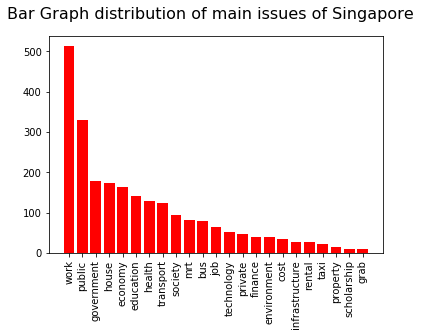

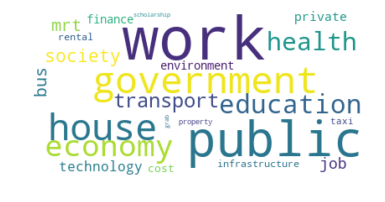

In [23]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
#from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer
import collections
import re

% matplotlib inline


# Warnings
import warnings
warnings.filterwarnings("ignore")

# Load in the dataframe
filenames = ['govsingapore_output.csv','leehsienloong_output.csv','PAPSingapore_output.csv','PeoplesPowerSG_output.csv',
            'thereformparty_output.csv','TPPSG_output.csv','wpsg_output.csv']

allText = []
for fn in filenames:
    print("Parsing through {}".format(fn))
    df = pd.read_csv(fn, encoding="ISO-8859-1") 
    text = df.full_text
    allText.extend(text)
    print(len(allText)) # debug


# Looking at first 5 rows of the dataset
#print(df.head())

# Print information about the dataset
print("There are {} observations and {} features in this dataset. \n".format(df.shape[0],df.shape[1]))
#print("There are {} types of wine in this dataset such as {}... \n".format(len(df.variety.unique()),
#                                                                           ", ".join(df.variety.unique()[0:5])))

# Start with one review:
#text = df.full_text
text1 = ",".join(allText)
text2 = text1.lower()

# Words I want to compare in the Word cloud
wordsIwant = ["transport","government","politic","education","job","work","scholarship","rental","house","private","property",
             "public","amenity","cost","technology","environment","economy","health","finance","infrastructure",
              "society","mrt","bus","taxi","grab"]

# Get root word by stemming
lancaster=LancasterStemmer()
text3 = lancaster.stem(text2)
#print(type(text3))
#print(text3[0:1000])


# Create and words you want to keep and remove stop words:
unknownWords = ['1','2','3','4','5','6','7','8','9','0','https','stcom','instagrammable', 'this']
unknownWords.extend(STOPWORDS)
#print(unknownWords)
unknownWords2 = set(unknownWords) # make unique
stopwords=unknownWords2


# get word count
wordcount = collections.defaultdict(int)
""" 
the next paragraph does all the counting and is the main point of difference from the original article. More on this is explained later.
"""
# \W is regex for characters that are not alphanumerics.
# all non-alphanumerics are replaced with a blank space using re.sub
pattern = r"\W"
for word in text3.split():
    word = re.sub(pattern, '', word)
    if word not in stopwords:
        if word in wordsIwant:
            wordcount[word] += 1 
        #for key in word:
            #if key in wordsIwant:

#printing most common words
#to_print = int(input("How many top words do you wish to print?"))
#print("The most common {n} words are:")

# the next line sorts the default dict on the values in decreasing  # order and prints the first "to_print".
mc = sorted(wordcount.items(), key=lambda k_v: k_v[1], reverse=True)
#[:to_print] # this is continued from the previous assignment
for word, count in mc:
    print(word, ":", count)
    
# Draw the bar chart
mc = dict(mc)
names = list(mc.keys())
values = list(mc.values())
fig = plt.figure()
plt.bar(range(len(mc)),values,tick_label=names ,color= 'red')
plt.xticks(range(len(mc)), names, rotation='vertical')
fig.suptitle('Bar Graph distribution of main issues of Singapore', fontsize=16)
plt.savefig('bar.png')
plt.show()

# Wordcloud picture
from wordcloud import WordCloud
wc = WordCloud(background_color='white').generate_from_frequencies(wordcount)
plt.figure()
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('WordCloudOfSingapore.png')
plt.show()



In [16]:
a = ['asd', 'asdasda', 'asdad']
print(a[0]+ "yyy"+a[2])
print("_yyy_".join(a))

asdyyyasdad
asd_yyy_asdasda_yyy_asdad


In [3]:
generateFreqList = WordCloud(stopwords=unknownWords2, regexp=r'\w+').process_text(text3)
#print(generateFreqList.keys())

for key in generateFreqList.keys():
    if key in wordsIwant:
        print(key)
        print(generateFreqList[key])

#generate word cloud image
wordcloud = WordCloud(stopwords=unknownWords2,
                         background_color='white').generate(text3)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


Porter Stemmer
cat
troubl
troubl
troubl
Lancaster Stemmer
cat
troubl
troubl
troubl
